# Brownian Motion, Black-Scholes, Monte Carlo and Delta Hedging with Python

In [1]:
## Required modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as si
import math

In [2]:
## European call function
def euro_call(S, K, T, r, sigma):

        # S: spot price
        # K: strike price
        # T: time to maturity 
        # r: interest rate
        # sigma: volatility of underlying asset

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    call = (S * si.norm.cdf(d1, 0, 1) - (K * np.exp(-r * T) * si.norm.cdf(d2, 0, 1)))

    return call 
    

In [3]:
## European put function
def euro_put(S, K, T, r, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - (S * si.norm.cdf(-d1, 0.0, 1.0)))
    
    return put

In [4]:
## European call example
call_price = euro_call(100, 100, 1, 0.02, 0.30)
print(f'The price of the Europen call option is ${round(call_price, 4)}')

The price of the Europen call option is $12.8216


In [5]:
## Black-Sholes Call
def black_scholes_call_div(S, K, T, c, r, sigma):

    # S: spot price
    # K: strike price
    # T: time to maturity
    # c: dividend rate of the asset (assumed continous rate)
    # r: interest rate
    # sigma: volatility of asset

    d1 = (np.log(S / K) + (r - c + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))   
    call = (np.exp(-c * T) * S * si.norm.cdf(d1, 0, 1)) - (np.exp(-r * T) * K * si.norm.cdf(d2, 0, 1))

    return call

In [6]:
black_sholes_price = black_scholes_call_div(100, 100, 1, 0, 0.02, 0.30)
print(f'The price of the Black Sholes call option is ${round(black_sholes_price, 4)}')

The price of the Black Sholes call option is $12.8216


In [7]:
def black_scholes_put_div(S, K, T, r, q, sigma):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #q: rate of continuous dividend paying asset 
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0))
    
    return put

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


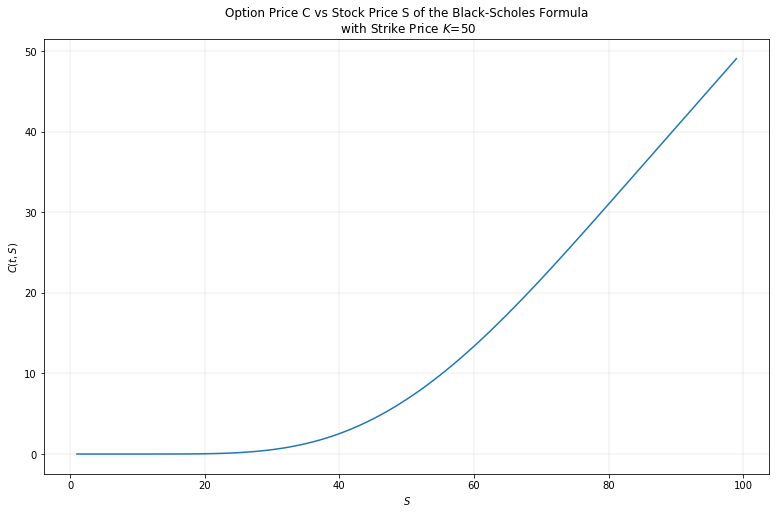

In [8]:
## Black-Scholes Formula for a Call Option ##

K = 50   ## Strike Price
r = 0.1 ## risk-free rate of interest
gamma = 0.4
T = 1 # Expiration Time in yrs 
a = 1 # Grid-Spacing
h = 0.01 # time-step
t = np.arange(0,T+h,h)
n = np.size(t)
S = np.arange(0,100+1,a)

d1 = (np.log(S/K) + (r + 0.5*(gamma**2))*(T - t))/(gamma*np.sqrt(T-t))
d2 = (np.log(S/K) + (r - 0.5*(gamma**2))*(T - t))/(gamma*np.sqrt(T-t))

def PDF(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)            ###Probability Density Function

N = 1001
def CDF(a,b):                             ###Cumulative Distribution Function using Trapezoidal rule
    h = (b-a)/(N-1)
    array = []
    for i in range(1,N-1):
        m = PDF(a+(i*h))
        array.append(m)
    g = np.sum(array)
    return h*(0.5*PDF(a)+0.5*PDF(b)+g)

C = []
for i in range(n):
    op = S[i]*CDF(-100,d1[i]) - K*np.exp(-r*(T-t[i]))*CDF(-100,d2[i])   ## Using Black-Scholes Formula
    C.append(op)

f = plt.figure()
f.set_figwidth(13)
f.set_figheight(8)

plt.plot(S, C)
plt.xlabel('$S$')
plt.ylabel('$C(t,S)$')
plt.title('Option Price C vs Stock Price S of the Black-Scholes Formula\n with Strike Price $K$=50')
plt.grid(linewidth=0.2)
plt.show()

In [9]:
## Monte Carlo Simulation Function
np.random.seed(1)
def sim_stocks(S0, r, sigma, nSims, steps = 252, T = 5):
    
    nSims = nSims
    sim_steps = steps * T
    dt = 1 / steps
    div = 0
    mu = (r - div - 0.5 * sigma * sigma ) * dt
    sigma = sigma * math.sqrt(dt)
    St = np.zeros(shape = (sim_steps, nSims))
    St[0, ] = S0
    
    for i in range(1, sim_steps):
            for j in range(0, nSims):
                e = np.random.randn(1)
                St[i, j] = St[i - 1, j] * math.exp(mu + sigma * e)
                
    return(St)

In [10]:
sim_stocks = np.vectorize(sim_stocks)
sim_stocks = sim_stocks(100, 0.05, 0.25, 100, 11 , 1)

In [11]:
import pandas as pd
pd.DataFrame(sim_stocks).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.020225,83.389091,104.080589,97.753585,89.386802,93.802248,93.848870,104.874135,104.502375,112.286466,...,111.218551,101.893197,104.561364,101.671597,98.772694,97.523892,100.898959,101.325297,109.284641,102.817936
2,98.196108,97.024646,94.673077,88.511488,91.964877,92.470080,82.238623,102.609474,99.220699,122.488838,...,105.082784,117.761334,104.647144,96.534120,109.786558,96.542129,96.263869,90.996296,116.095928,94.895980
3,94.447112,102.025261,96.156407,88.086759,90.647770,100.984516,97.460079,98.619638,103.744791,141.898675,...,110.696953,117.693151,98.423451,97.486250,113.570442,94.127889,100.912434,93.337742,119.251036,81.554984
4,102.640748,116.385260,93.442242,78.941046,95.282579,97.667741,90.763397,108.284689,93.631078,150.039113,...,101.598540,132.236648,94.542869,80.269132,139.567553,86.797937,111.566651,98.808785,125.473584,80.281015


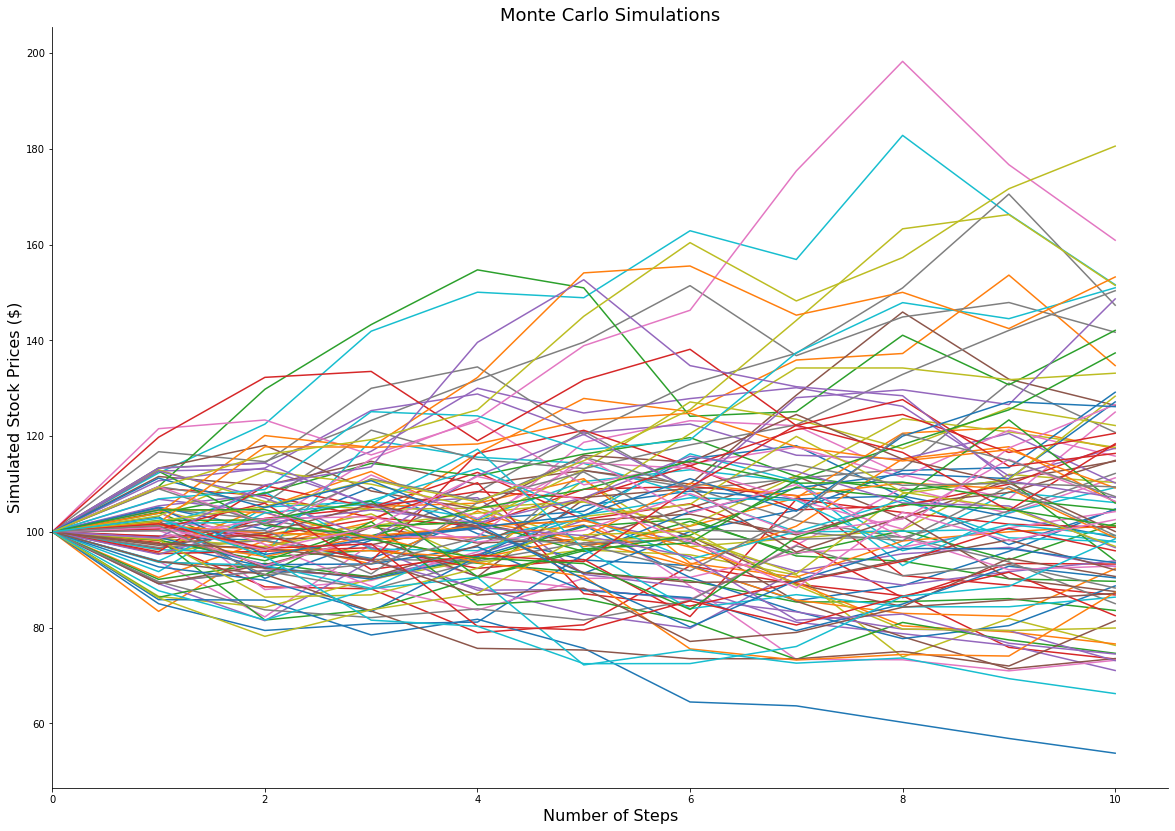

In [12]:
## Plotting the simulations
plt.figure(figsize = (20, 14))
plt.plot(pd.DataFrame(sim_stocks))
plt.title("Monte Carlo Simulations", size = 18)
plt.xlabel("Number of Steps", size = 16)
plt.ylabel("Simulated Stock Prices ($)", size = 16)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(xmin = 0)
plt.show()

In [13]:
## Black-Sholes Call
def black_scholes_delta(S, K, T, c, r, sigma):

    # S: spot price
    # K: strike price
    # T: time to maturity
    # c: dividend rate of the asset (assumed continous rate)
    # r: interest rate
    # sigma: volatility of asset

    d1 = (np.log(S / K) + (r - c + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - (sigma * np.sqrt(T))   
    call = (np.exp(-c * T) * S * si.norm.cdf(d1, 0, 1)) - (np.exp(-r * T) * K * si.norm.cdf(d2, 0, 1))
    delta = np.exp(-c * T) * si.norm.cdf(d1, 0, 1)

    return call, delta

In [14]:
black_scholes_delta(400, 100, 0.5, 0.01, 0.01, 0.3)

(298.5037437580004, 0.9950124791771945)

In [15]:
def delta_hedge(S, K, T, sigma, imp_sigma, r, c, N, n):
    
    dt = T / N
    price_array = np.zeros([N + 1, n])
    delta_array = np.zeros([N + 1, n])
    PnL = np.zeros([N + 1, n])
    strike_array = np.zeros([1, n])
    PnL_diff = np.zeros([1, n])

    for i in range(n):
        price_array[0, i] = S
        delta_array[0, i] = black_scholes_delta(S, K, T, c, r, imp_sigma)[1]
        PnL[0, i] = black_scholes_delta(S, K, T, c, r, imp_sigma)[0]

        for j in range(1, N + 1):
            price_array[j, i] = price_array[j - 1, i] * np.exp(dt * (r - ((sigma) ** 2) / 2) + 
                                                                     (np.sqrt(dt)) * np.random.randn(1) * sigma)
            delta_array[j, i] = black_scholes_delta(price_array[j, i], K, T, c, r, sigma)[1]

            PnL[j, i] = PnL[j - 1, i] + (PnL[j - 1, i] - delta_array[j - 1, i] * 
                                         price_array[j - 1, i]) * r * dt + delta_array[j - 1, i] * (
                price_array[j, i] + c *dt * price_array[j - 1, i] - price_array[j - 1, i])
             
        strike_array[0, i] = max(price_array[N, i] - K, 0)
        PnL_diff[0, i] = PnL[N, i] - strike_array[0, i]
        
    return price_array, PnL, PnL_diff

In [16]:
%%time
pnl = delta_hedge(100, 100, 1, 0.3, 0.3, 0.01, 0.01, 252, 1000)

CPU times: user 1min 23s, sys: 336 ms, total: 1min 24s
Wall time: 1min 24s


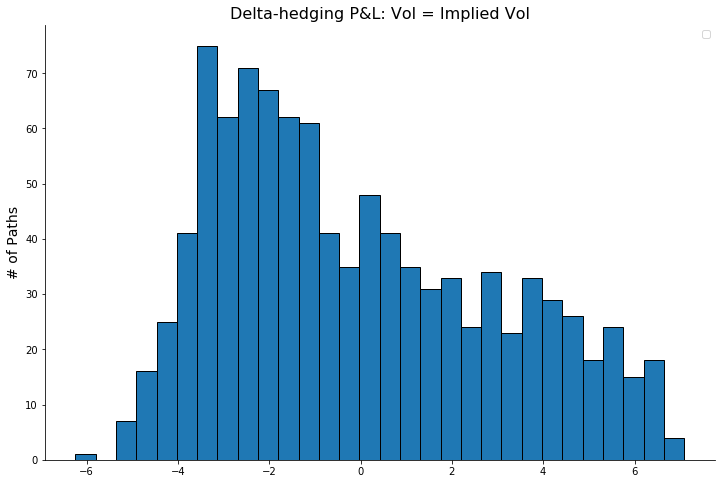

In [17]:
## Plotting PnL histogram
pnl_df = pd.DataFrame(pnl[2])

pnl_df.T.plot.hist(bins = 30, edgecolor='black', figsize = (12, 8), color = '#1f78b4')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Delta-hedging P&L: Vol = Implied Vol', size = 16)
plt.ylabel('# of Paths', size = 14)
plt.legend([])
plt.show()

In [18]:
%%time
pnl = delta_hedge(100, 100, 1, 0.3, 0.4, 0.01, 0.01, 252, 1000)

CPU times: user 1min 25s, sys: 406 ms, total: 1min 25s
Wall time: 1min 26s


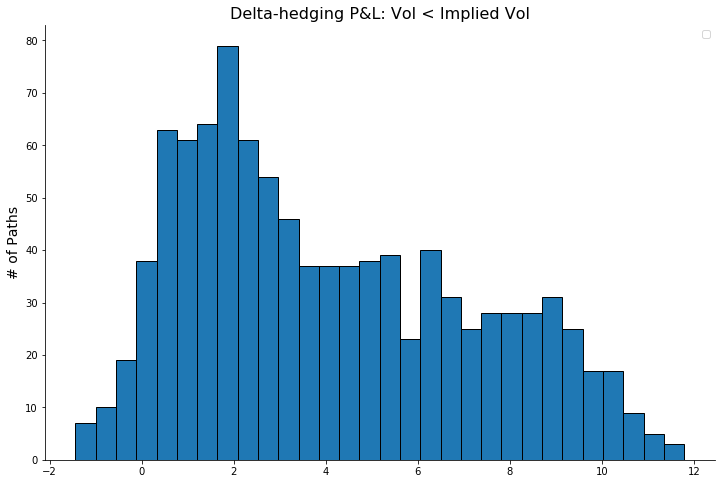

In [19]:
## Plotting PnL histogram
pnl_df = pd.DataFrame(pnl[2])

pnl_df.T.plot.hist(bins = 30, edgecolor='black', figsize = (12, 8), color = '#1f78b4')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Delta-hedging P&L: Vol < Implied Vol', size = 16)
plt.ylabel('# of Paths', size = 14)
plt.legend([])
plt.show()

In [20]:
%%time
pnl = delta_hedge(100, 100, 1, 0.3, 0.2, 0.01, 0.01, 252, 1000)

CPU times: user 1min 21s, sys: 328 ms, total: 1min 21s
Wall time: 1min 21s


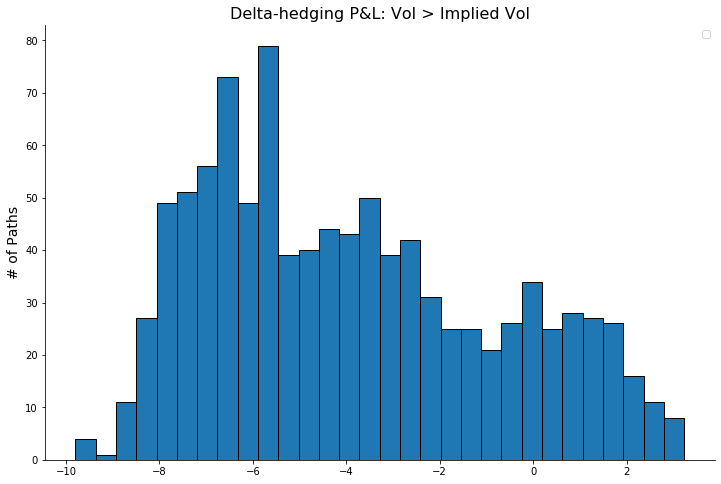

In [21]:
## Plotting PnL histogram
pnl_df = pd.DataFrame(pnl[2])

pnl_df.T.plot.hist(bins = 30, edgecolor='black', figsize = (12, 8), color = '#1f78b4')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.title('Delta-hedging P&L: Vol > Implied Vol', size = 16)
plt.ylabel('# of Paths', size = 14)
plt.legend([])
plt.show()

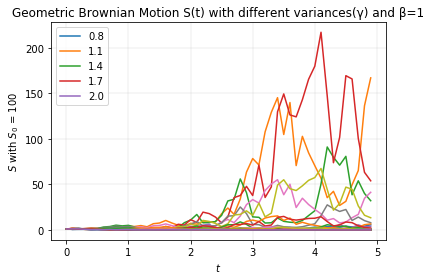

In [22]:
## Geometric Brownian Motion ##

beta = 1  #beta
gamma = np.arange(0.8,2.1,0.3) #for different variances
x0 = 100
t = np.arange(0,5,0.1)
dt = 0.1
n = np.size(t)
np.random.seed(59) ## seeding

dW_t = np.random.normal(0, np.sqrt(dt), size = (len(gamma), n-1))   ## Brownian Motion has gaussian increments
dW_t = np.insert(dW_t,[0,49,98,147,196],0)  ##since Brownian Motio starts from 0
dW_t = dW_t.reshape((len(gamma), n))
W_t = np.empty([len(gamma), n], float)
for i in range(len(gamma)):
    W_t[i,:] = np.cumsum(dW_t[i,:])  ## Cumulative sum of the increments to give the 'particle positions'
    
diff_term = gamma*(W_t).T  #Diffusion Term
drift = (beta - 0.5*gamma**2)  #Drift Term

for i in range(0,len(gamma)):
    x = []
    for j in range(0,n):
        m = np.exp((t[j]*drift[i]) + diff_term[j])   ##Using the Geometric Borwnian Motion formula
        x.append(m)
    plt.plot(t,x)  #plotting

        
plt.legend(np.round(gamma,2))
plt.xlabel('$t$')
plt.ylabel('$S$ with $S_{0}$ = 100')
plt.title("Geometric Brownian Motion S(t) with different variances(\u03B3) and \u03B2=1")
plt.grid(linewidth=0.2)
plt.show()